<a href="https://colab.research.google.com/github/supunabeywickrama/computer-vision-with-embedded-machine-learning/blob/main/image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install pillow scikit-image


1.Load an Image

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

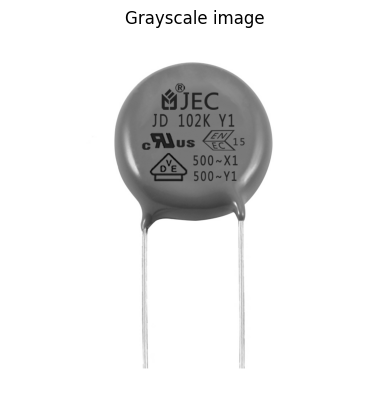

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt


img_path = os.path.join("/content/sample.jpg")
img_pil = Image.open(img_path)
img = img_pil.convert("L")

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale image")
plt.axis('off')



#/content/sample.jpg

Convert PIL image → NumPy array

Array shape: (1000, 1000)
First row: [255 255 255 255 255 255 255 255 255 255]
First column: [255 255 255 255 255 255 255 255 255 255]


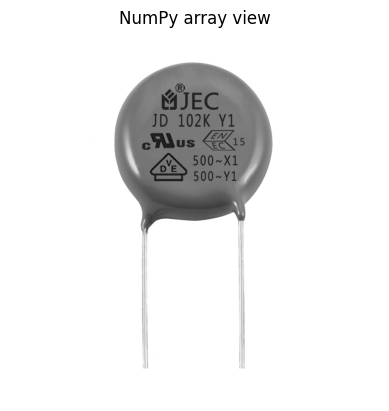

In [ ]:
import numpy as np

img_array = np.asarray(img, dtype=np.uint8)   .255

plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
plt.title("NumPy array view")
plt.axis('off')

print("Array shape:", img_array.shape)
print("First row:", img_array[0, :10])    # first 10 pixels in first row
print("First column:", img_array[:10, 0]) # first 10 pixels in first column


Resize to 50*50 (using scikit-image), then convert back to 0..255 uint8





Resized shape: (50, 50)


(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

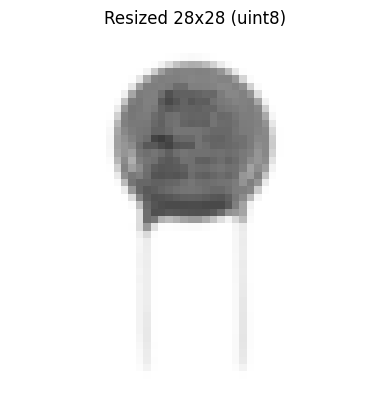

In [ ]:
from skimage.transform import resize

# Resize to 50*50; skimage returns float64 in [0.0, 1.0] by default
img_resized_f = resize(img_array, (50, 50), anti_aliasing=True)

# Convert to 0..255 uint8
img_resized = np.clip(np.rint(img_resized_f * 255.0), 0, 255).astype(np.uint8)

print("Resized shape:", img_resized.shape)

# View (should now show correctly, not black)
plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)
plt.title("Resized 28x28 (uint8)")
plt.axis('off')


Draw a 10×10 white square (outline, thickness=1) in the center



(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

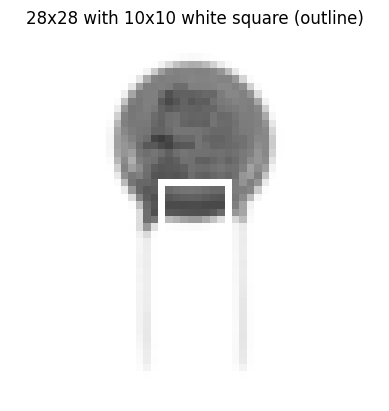

In [ ]:
# Make a copy to draw on
img_with_box = np.copy(img_resized)

H, W = img_with_box.shape
box_size = 10

# Find top-left corner so that the box is centered
top = (H - box_size) // 2
left = (W - box_size) // 2
bottom = top + box_size - 1
right  = left + box_size - 1

# Draw outline (value 255 = white)
img_with_box[top, left:right+1] = 255        # top edge
img_with_box[bottom, left:right+1] = 255     # bottom edge
img_with_box[top:bottom+1, left] = 255       # left edge
img_with_box[top:bottom+1, right] = 255      # right edge

# Show result
plt.imshow(img_with_box, cmap='gray', vmin=0, vmax=255)
plt.title("28x28 with 10x10 white square (outline)")
plt.axis('off')
